In [158]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random
import joblib

In [2]:
df = pd.read_csv("./data/cancer_prediction_dataset.csv")
df

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
0,1,85,1,0,1,0
1,1,93,0,0,0,0
2,1,72,0,1,0,0
3,0,58,0,0,1,0
4,1,95,1,0,1,1
...,...,...,...,...,...,...
9995,1,89,1,0,1,0
9996,0,23,1,1,0,0
9997,1,99,0,0,1,0
9998,0,26,0,1,1,0


In [3]:
df.describe()

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.497500,59.318400,0.500200,0.501800,0.499900,0.096400
std,0.500019,23.908952,0.500025,0.500022,0.500025,0.295154
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,60.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,80.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df["Gender"].value_counts()

Gender
0    5025
1    4975
Name: count, dtype: int64

In [5]:
df["Smoking"].value_counts()

Smoking
1    5002
0    4998
Name: count, dtype: int64

In [6]:
df["Fatigue"].value_counts()

Fatigue
1    5018
0    4982
Name: count, dtype: int64

In [7]:
df["Allergy"].value_counts()

Allergy
0    5001
1    4999
Name: count, dtype: int64

In [8]:
df["Cancer"].value_counts()

Cancer
0    9036
1     964
Name: count, dtype: int64

In [9]:
df["Age"].mean()

59.3184

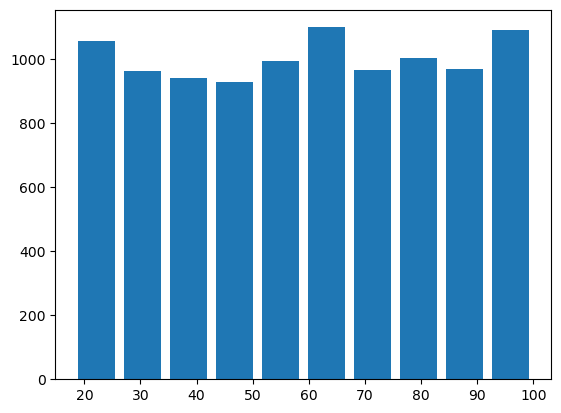

In [10]:
plt.hist(data=df , x ="Age", rwidth=0.8)
plt.show()

In [11]:
df["Cancer"].value_counts().sort_index()

Cancer
0    9036
1     964
Name: count, dtype: int64

In [12]:
df["Gender"].value_counts().sort_index()

Gender
0    5025
1    4975
Name: count, dtype: int64

In [13]:
df["Smoking"].value_counts().sort_index()

Smoking
0    4998
1    5002
Name: count, dtype: int64

C:\Users\4005\anaconda3\envs\streamlit\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\4005\anaconda3\envs\streamlit\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\4005\anaconda3\envs\streamlit\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


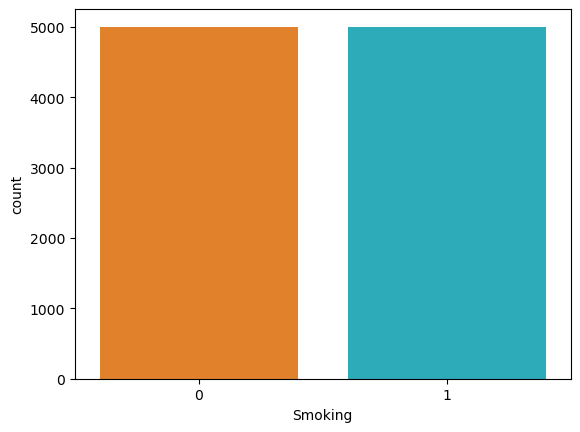

In [14]:
colors = random.sample(sb.color_palette(), 2)
sb.countplot(data=df , x="Smoking", palette=[colors[0],colors[1]])
plt.show()

In [15]:
df

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
0,1,85,1,0,1,0
1,1,93,0,0,0,0
2,1,72,0,1,0,0
3,0,58,0,0,1,0
4,1,95,1,0,1,1
...,...,...,...,...,...,...
9995,1,89,1,0,1,0
9996,0,23,1,1,0,0
9997,1,99,0,0,1,0
9998,0,26,0,1,1,0


In [16]:
df.isna().sum()

Gender     0
Age        0
Smoking    0
Fatigue    0
Allergy    0
Cancer     0
dtype: int64

In [17]:
df

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
0,1,85,1,0,1,0
1,1,93,0,0,0,0
2,1,72,0,1,0,0
3,0,58,0,0,1,0
4,1,95,1,0,1,1
...,...,...,...,...,...,...
9995,1,89,1,0,1,0
9996,0,23,1,1,0,0
9997,1,99,0,0,1,0
9998,0,26,0,1,1,0


In [104]:
# X, y 로 나누기
X = df.iloc[ : , :-1]
y = df.iloc[ : , -1]

In [105]:
y

0       0
1       0
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Cancer, Length: 10000, dtype: int64

In [106]:
X

,Gender,Age,Smoking,Fatigue,Allergy
0,1,85,1,0,1
1,1,93,0,0,0
2,1,72,0,1,0
3,0,58,0,0,1
4,1,95,1,0,1
...,...,...,...,...,...
9995,1,89,1,0,1
9996,0,23,1,1,0
9997,1,99,0,0,1
9998,0,26,0,1,1


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
scaler_X = MinMaxScaler()
scaler_X

MinMaxScaler()

In [109]:
X_scaled = scaler_X.fit_transform(X)
X_scaled

array([[1.        , 0.81707317, 1.        , 0.        , 1.        ],
       [1.        , 0.91463415, 0.        , 0.        , 0.        ],
       [1.        , 0.65853659, 0.        , 1.        , 0.        ],
       ...,
       [1.        , 0.98780488, 0.        , 0.        , 1.        ],
       [0.        , 0.09756098, 0.        , 1.        , 1.        ],
       [1.        , 0.41463415, 1.        , 1.        , 0.        ]])

In [110]:
y.value_counts()

Cancer
0    9036
1     964
Name: count, dtype: int64

In [111]:
# train, test 데이터로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 0)

In [112]:
X_train.shape

(8000, 5)

In [113]:
X_test.shape

(2000, 5)

In [114]:
y_train.shape

(8000,)

In [115]:
y_test.shape

(2000,)

In [116]:
# 모델링
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()

In [117]:
# 학습
model.fit(X_train, y_train)

LogisticRegression()

In [118]:
y_pred = model.predict(X_test)

In [119]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [120]:
y_test

9394    0
898     0
2398    1
5906    0
2343    0
       ..
1037    0
2899    1
9549    0
2740    0
6690    0
Name: Cancer, Length: 2000, dtype: int64

In [121]:
from sklearn.metrics import confusion_matrix

In [124]:
confusion_matrix(y_test, y_pred)

array([[1809,    0],
       [ 191,    0]], dtype=int64)

In [37]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
y_pred.sum()

0

In [125]:
y_pred = model.predict_proba(X_test)

In [126]:
y_pred

array([[0.89997995, 0.10002005],
       [0.90799007, 0.09200993],
       [0.89634515, 0.10365485],
       ...,
       [0.90176632, 0.09823368],
       [0.90078165, 0.09921835],
       [0.90544528, 0.09455472]])

In [127]:
from sklearn.svm import SVC

In [128]:
model = SVC()

In [129]:
model.fit(X_train, y_train)

SVC()

In [44]:
y_pred = model.predict(X_test)

In [45]:
y_pred.sum()

0

In [46]:
y.value_counts()

Cancer
0    9036
1     964
Name: count, dtype: int64

In [47]:
# 암인사람과 암이 아닌사람의 데이터 갯수가 불균형.
# up sampling 기법을 통해서 데이터 갯수 불균형 해소.

In [48]:
! pip install imblearn

   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ------ --------------------------------- 41.0/235.6 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 4.9 MB/s eta 0:00:00


In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
sm = SMOTE(random_state=0)

In [51]:
X_scaled_up, y_up = sm.fit_resample(X_scaled, y)

In [131]:
y_up.value_counts()

Cancer
0    9036
1    9036
Name: count, dtype: int64

In [132]:
X_scaled_up

array([[1.        , 0.81707317, 1.        , 0.        , 1.        ],
       [1.        , 0.91463415, 0.        , 0.        , 0.        ],
       [1.        , 0.65853659, 0.        , 1.        , 0.        ],
       ...,
       [0.        , 0.31105268, 1.        , 0.        , 0.        ],
       [0.        , 0.12810451, 0.        , 0.        , 1.        ],
       [1.        , 0.03658537, 0.        , 1.        , 1.        ]])

In [133]:
len(X_scaled_up)

18072

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_up, y_up, test_size=0.2, random_state=0)

In [135]:
X_train.shape

(14457, 5)

In [136]:
X_test.shape

(3615, 5)

In [137]:
model = SVC(random_state=0, kernel='linear')

In [138]:
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [140]:
y_pred = model.predict(X_test)

In [144]:
cm = confusion_matrix(y_test, y_pred)

In [145]:
cm

array([[897, 884],
       [847, 987]], dtype=int64)

In [146]:
# Accuracy 정확도
(897 + 987) / cm.sum()

0.5211618257261411

In [147]:
from sklearn.metrics import accuracy_score

In [148]:
accuracy_score(y_test, y_pred)

0.5211618257261411

In [65]:
model = LogisticRegression()

In [66]:
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
y_pred = model.predict(X_test)

In [68]:
y_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
y_test

10609    1
1644     0
2330     0
2777     0
4172     0
        ..
2267     0
6698     0
12190    1
16579    1
604      0
Name: Cancer, Length: 3615, dtype: int64

In [70]:
confusion_matrix(y_test, y_pred)

array([[991, 790],
       [919, 915]], dtype=int64)

In [71]:
(991+915) / cm.sum()

0.5272475795297372

In [72]:
accuracy_score(y_test, y_pred)

0.5272475795297372

In [151]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
model = KNeighborsClassifier(n_neighbors= 2)

In [153]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [154]:
y_pred = model.predict(X_test)

In [155]:
confusion_matrix(y_test, y_pred)

array([[1669,  112],
       [ 766, 1068]], dtype=int64)

In [156]:
accuracy_score(y_test, y_pred)

0.7571230982019364

In [159]:
joblib.dump(model, "model.pkl")

['model.pkl']

In [157]:
model

KNeighborsClassifier(n_neighbors=2)

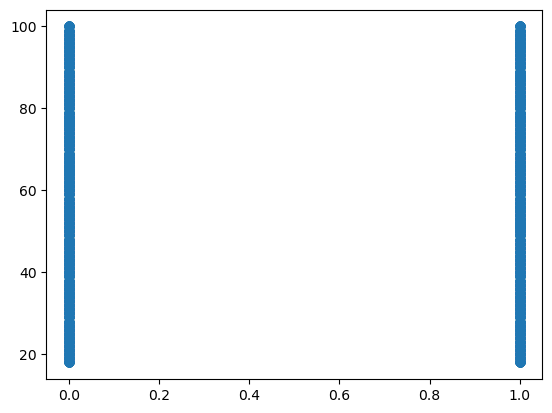

In [79]:
plt.scatter(data=df, x="Gender", y="Age")
plt.show()

C:\Users\4005\anaconda3\envs\streamlit\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12615 (\N{HANGUL LETTER IEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


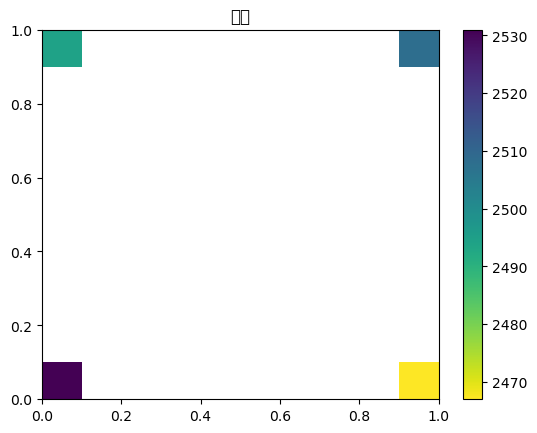

In [80]:
plt.hist2d(data=df, x="Gender", y="Smoking", cmin=0.5, cmap="viridis_r")
plt.colorbar()

plt.title("ㅇㅇ")
plt.show()

C:\Users\4005\anaconda3\envs\streamlit\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\4005\anaconda3\envs\streamlit\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\4005\anaconda3\envs\streamlit\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\4005\anaconda3\envs\streamlit\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

C:\Users\4005\anaconda3\envs\streamlit\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\4005\anaconda3\envs\streamlit\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\4005\anaconda3\envs\streamlit\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\4005\anaconda3\envs\streamlit\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

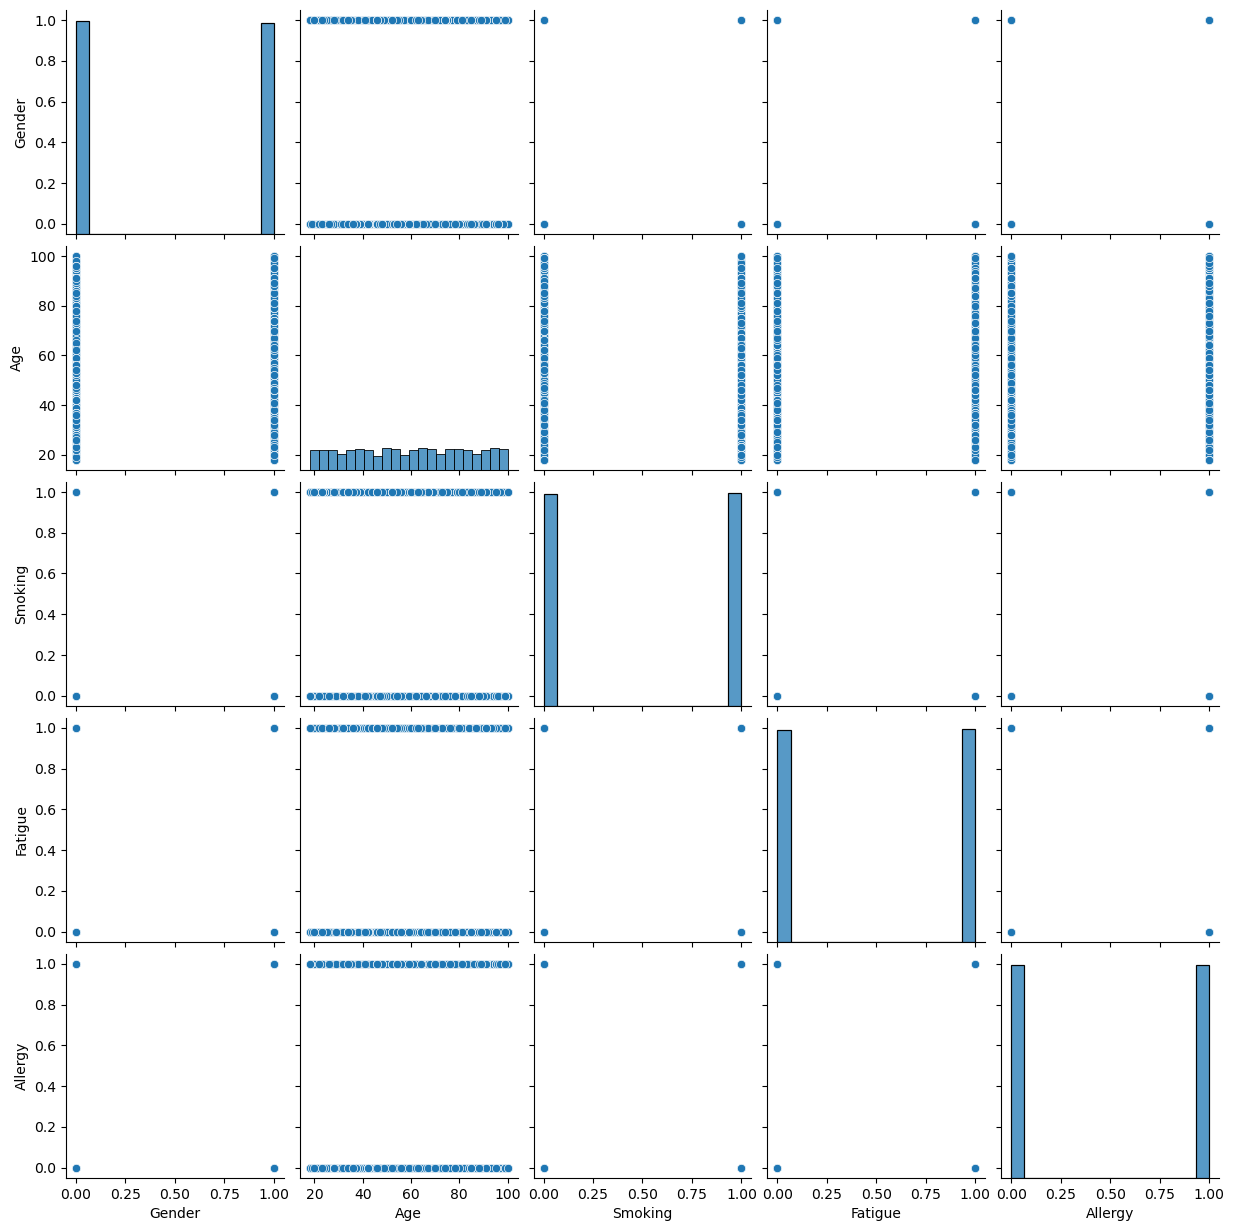

In [81]:
sb.pairplot(data=df, vars=["Gender","Age","Smoking","Fatigue","Allergy"])
plt.show()

In [82]:
df.corr()

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
Gender,1.000000,0.015459,0.007802,-0.011382,-0.007201,-0.014631
Age,0.015459,1.000000,-0.007384,-0.011392,-0.006372,-0.016963
Smoking,0.007802,-0.007384,1.000000,0.011199,0.019400,-0.004197
Fatigue,-0.011382,-0.011392,0.011199,1.000000,0.006201,-0.001854
Allergy,-0.007201,-0.006372,0.019400,0.006201,1.000000,0.004131
Cancer,-0.014631,-0.016963,-0.004197,-0.001854,0.004131,1.000000


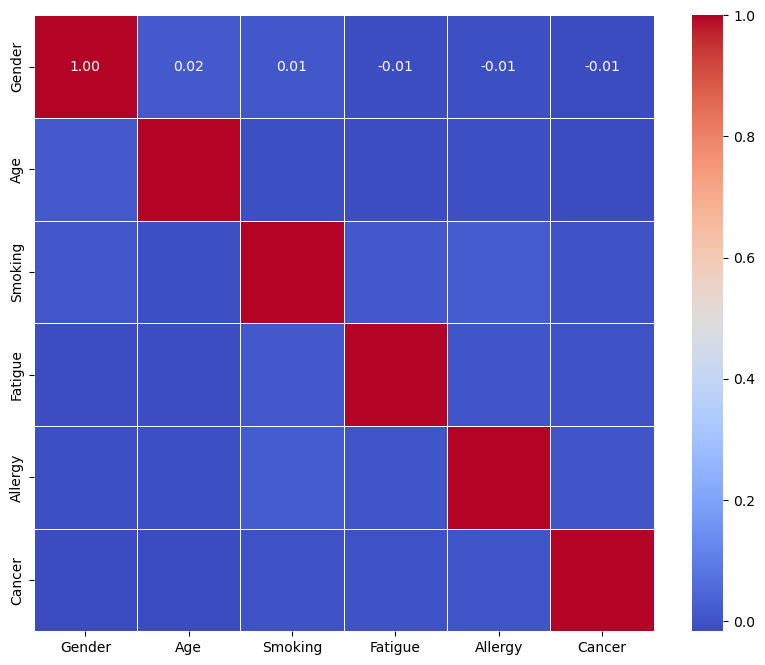

In [83]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.show()

In [84]:
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')